# __Исследовательский анализ игровой индустрии.__   ✔✔

## Описание проекта ##

Вы работаете в интернет-магазине __«Стримчик»__, который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, __Xbox__ или __PlayStation__). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.  
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.  
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Описание данных ##

__Name__ — название игры  
__Platform__ — платформа  
__Year_of_Release__ — год выпуска   
__Genre__ — жанр игры  
__NA_sales__ — продажи в Северной Америке (миллионы проданных копий)  
__EU_sales__ — продажи в Европе (миллионы проданных копий)  
__JP_sales__ — продажи в Японии (миллионы проданных копий)  
__Other_sales__ — продажи в других странах (миллионы проданных копий)  
__Critic_Score__ — оценка критиков (максимум 100)  
__User_Score__ — оценка пользователей (максимум 10)  
__Rating__ — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.  
  
  
Данные за 2016 год могут быть неполными.

__Импортируем библиотеки__

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st

### 1. Первое знакомство с данными ###

Загружаем данные и делаем копию базы

In [2]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')
games = df.copy()

In [3]:
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


__Итог первого взгляда__ в певых строчках очень много пропусков, плохой признак.

__1.1 Общаяя информация о DF__

In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


__User_Score__ - object а должен быть flioat,  давольно много пропусков, посмотрим на них поближе

In [5]:
print('Общее кол-во пропусков', (games.isna().mean()*100).mean().round(2),'%')
pd.DataFrame((games.isna().mean()*100).sort_values(ascending=False).round(2)).style.background_gradient('coolwarm')

Общее кол-во пропусков 12.14 %


,0
Critic_Score,51.320000
Rating,40.480000
User_Score,40.090000
Year_of_Release,1.610000
Name,0.010000
Genre,0.010000
Platform,0.000000
NA_sales,0.000000
EU_sales,0.000000
JP_sales,0.000000


__Вывод:__
Прведарительный вывод, __12,14%__ данных из вего DF отсутсуют, давольно "грязные" данные. Больше всего в:  
___Critic_Score___ - оценка критиков можно предположить что не все игры проходили через реки этих критиков, но так как отсутсвующих данных больше 50% то удолять их нельзя, возможно заполню минимальным неиспользуемым значением, так как не среднее ни мианное значение данному столбцу не подхлдят.  
___Rating___ - рейтинг сдесь тоже самое возможно игры не проходими проверку на возростные огранечения или ещё не было этой организации. Следовательно заполним значением "not tested".  
___User_Score___ - оценка пользователей, могу предположить что не все площадки или консоли прасили пользователей оченить их игру. Поэтому сдалаю так же как и с полем ___Critic_Score___  
___Year_of_Release___ - год релиза, тут проблемы я не вижу скоррее всего вышла betta а потом релиз но эти события были в разные года, то так как пропусков не много то трогать их не буду, существенного лияния они не казывают, текже поступлю и с ___Genre,___ и с ___Name___.

### 2. Подготовка данных ###


Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
Опишите причины, которые могли привести к пропускам;
Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;
Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

__2.1 Приведем к нижнему регистру название столбцов__

In [6]:
games.columns = games.columns.str.lower()

__2.2 Поменяем тип в стобце и обработаем tbd__

In [7]:
games['user_score'].sort_values(ascending=False).unique()

array(['tbd', '9.7', '9.6', '9.5', '9.4', '9.3', '9.2', '9.1', '9', '8.9',
       '8.8', '8.7', '8.6', '8.5', '8.4', '8.3', '8.2', '8.1', '8', '7.9',
       '7.8', '7.7', '7.6', '7.5', '7.4', '7.3', '7.2', '7.1', '7', '6.9',
       '6.8', '6.7', '6.6', '6.5', '6.4', '6.3', '6.2', '6.1', '6', '5.9',
       '5.8', '5.7', '5.6', '5.5', '5.4', '5.3', '5.2', '5.1', '5', '4.9',
       '4.8', '4.7', '4.6', '4.5', '4.4', '4.3', '4.2', '4.1', '4', '3.9',
       '3.8', '3.7', '3.6', '3.5', '3.4', '3.3', '3.2', '3.1', '3', '2.9',
       '2.8', '2.7', '2.6', '2.5', '2.4', '2.3', '2.2', '2.1', '2', '1.9',
       '1.8', '1.7', '1.6', '1.5', '1.4', '1.3', '1.2', '1.1', '1', '0.9',
       '0.7', '0.6', '0.5', '0.3', '0.2', '0', nan], dtype=object)

In [8]:
games[games['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


__TBD - to be determined__ = будет определено. Ставят когда очень мало данных, но они есть, их можно прировнять к NaN

In [9]:
games['user_score'] = games['user_score'].replace('tbd', np.NaN) 
games['user_score'] = games['user_score'].astype('float')


In [10]:
games['user_score'].sort_values(ascending=False).unique() # проверяем на наличие TBD

array([9.7, 9.6, 9.5, 9.4, 9.3, 9.2, 9.1, 9. , 8.9, 8.8, 8.7, 8.6, 8.5,
       8.4, 8.3, 8.2, 8.1, 8. , 7.9, 7.8, 7.7, 7.6, 7.5, 7.4, 7.3, 7.2,
       7.1, 7. , 6.9, 6.8, 6.7, 6.6, 6.5, 6.4, 6.3, 6.2, 6.1, 6. , 5.9,
       5.8, 5.7, 5.6, 5.5, 5.4, 5.3, 5.2, 5.1, 5. , 4.9, 4.8, 4.7, 4.6,
       4.5, 4.4, 4.3, 4.2, 4.1, 4. , 3.9, 3.8, 3.7, 3.6, 3.5, 3.4, 3.3,
       3.2, 3.1, 3. , 2.9, 2.8, 2.7, 2.6, 2.5, 2.4, 2.3, 2.2, 2.1, 2. ,
       1.9, 1.8, 1.7, 1.6, 1.5, 1.4, 1.3, 1.2, 1.1, 1. , 0.9, 0.7, 0.6,
       0.5, 0.3, 0.2, 0. , nan])

__2.3 Обработаем пропуски:__

Как уже и говорил в столбце critic_score значение NaN заменю на -1 так как оно не используется и не будет мешать.

In [11]:
games['critic_score'].sort_values(ascending=False).unique()

array([98., 97., 96., 95., 94., 93., 92., 91., 90., 89., 88., 87., 86.,
       85., 84., 83., 82., 81., 80., 79., 78., 77., 76., 75., 74., 73.,
       72., 71., 70., 69., 68., 67., 66., 65., 64., 63., 62., 61., 60.,
       59., 58., 57., 56., 55., 54., 53., 52., 51., 50., 49., 48., 47.,
       46., 45., 44., 43., 42., 41., 40., 39., 38., 37., 36., 35., 34.,
       33., 32., 31., 30., 29., 28., 27., 26., 25., 24., 23., 22., 21.,
       20., 19., 17., 13., nan])

In [12]:
games['critic_score'] = games['critic_score'].fillna(-1)      # Заполняем пустые значение у критиков
games['user_score'] = games['user_score'].fillna(-1)          # Заполняем пустые значение у пользователей


print('Кол-во пропусков с стоблце critic_score =',games['critic_score'].isna().sum()) # проверяем
print('Кол-во пропусков с стоблце user_score =',games['user_score'].isna().sum())

Кол-во пропусков с стоблце critic_score = 0
Кол-во пропусков с стоблце user_score = 0


In [13]:
games['rating'] = games['rating'].fillna('not tested')

print('Кол-во пропусков с стоблце rating =',games['rating'].isna().sum()) # проверяем

Кол-во пропусков с стоблце rating = 0


__2.4 Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.__

In [14]:
games['total_sale'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

Подготовил данные, заполнил пропуски, поменял тип стобцов создал доподнительную колонку с общей суммой. ✔

### 3. Исследовательский анализ данных ###

__3.1 График кол-во игр выпускаемых в разные годы.__

In [15]:
games = games.dropna(subset=['year_of_release'])
games['year_of_release'] = games['year_of_release'].astype(int)

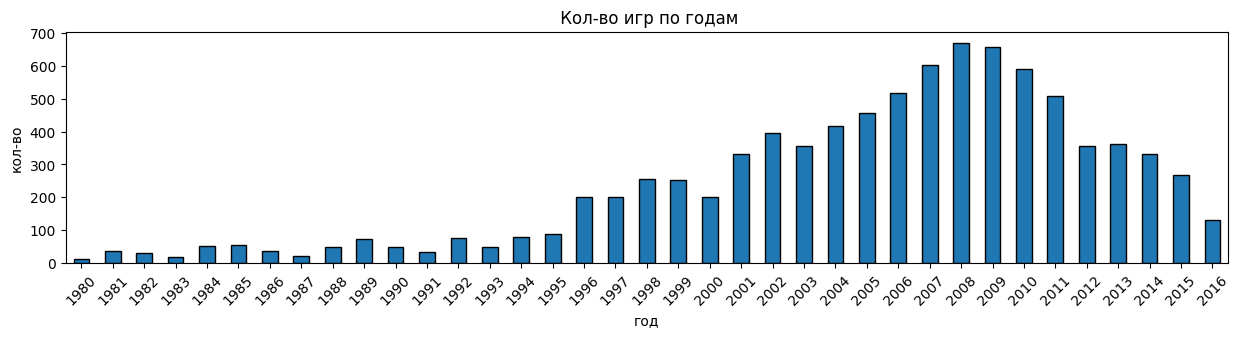

In [16]:
games.groupby('year_of_release')['total_sale'].sum().plot(kind = 'bar', figsize = (15, 3), edgecolor='black', rot=45, title = ' Кол-во игр по годам', ylabel='кол-во', xlabel='год' )
pass

Данные до 1994 года не имеют осоой ценности. Дальше мы видим устойчевый рост популярности до 2008-2009 года с небольшым провалом "проблемы нулевых". Снижение обусловлено появление соц. сетей и переходом пользователей с другие области. 

__3.2 График количество выпущенных игр по платформам.__

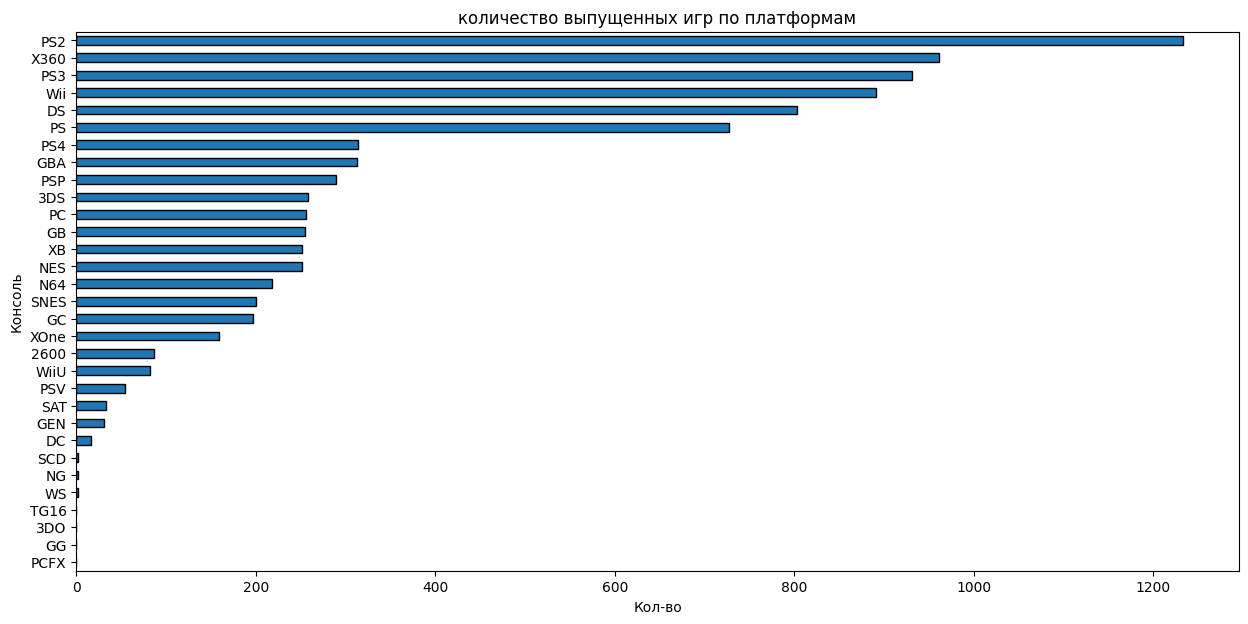

In [17]:
games.groupby('platform')['total_sale'].sum().sort_values(ascending=True).plot(kind = 'barh',  figsize = (15, 7), edgecolor='black', rot=0, 
                                                                               title ='количество выпущенных игр по платформам'
                                                                              ,xlabel='Кол-во', ylabel='Консоль')
pass

Максимум у PS2, скорее всего вызван мексимальной распространённостью консоли как на вастоке так и на западе. Браво!

__3.3  График динамики продаж по годам по каждой платформе.__

In [18]:
#costs_pivot = games.pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sale', aggfunc = 'sum')
#costs_pivot.plot(kind='line', figsize = (15,4), title = 'Кол-во игр по платформам за год', marker='o', fontsize=10, linewidth=1)
#plt.xlabel('Год')
#plt.legend(title='Консоли', loc = 1, bbox_to_anchor=(1.1, 1.03))
#plt.show()

In [19]:
def pic_platform(platforms = None, query = None):
    legend_list = []
    
    for i in platforms:
        if query == None:
                df_to_plot = games.query('platform == @i')
                lines = df_to_plot.groupby('year_of_release')['total_sale'].sum().plot(kind='line', figsize = (15,4), title = 'Кол-во игр по платформам за год'
                                                                                       , marker='o', fontsize=10, linewidth=1)
                plt.xlabel('')
                legend_list.append(i)
                plt.legend(legend_list, title='Консоли', loc = 1, bbox_to_anchor=(1.1, 1.03))
        else:
                df_to_plot = games.query('platform == @i').query(query)
                lines = df_to_plot.groupby('year_of_release')['total_sale'].sum().plot(kind='line', figsize = (15,4), title = 'Кол-во игр по платформам за год', marker='o', fontsize=10, linewidth=1)
                plt.xlabel('')
                legend_list.append(i)
                plt.legend(legend_list, title='Консоли', loc = 1, bbox_to_anchor=(1.1, 1.03))

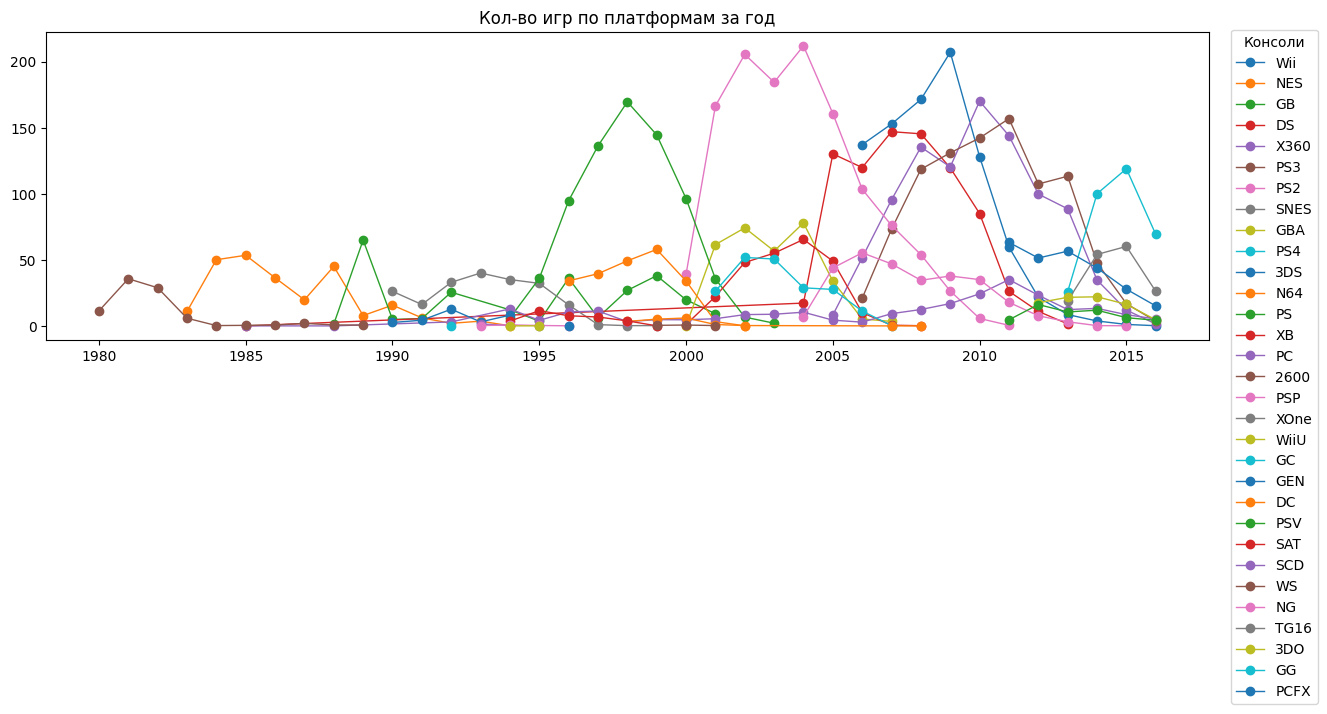

In [20]:
pic_platform(platforms = games['platform'].unique())

Очень пергруженый граффик но даже на нем можно уже увдить что-то интерестное. 

Выделим наиболее популярны следующие консоли(наиболее популярные не значет наиболее перспективные):

In [21]:
games.groupby('platform')['total_sale'].sum().sort_values(ascending=False).head(10)

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
Name: total_sale, dtype: float64

__3.4 График самых популярных платформ.__

Выберем топ-6 так как раздница между 6 и 5 не большая и 6 и 7 существенная. Так же включу в график данные платформ которые на 2015 год показывали рост, это __PS4__ и __XOne__.

In [22]:
games.groupby('platform').agg({'total_sale': 'sum'}).sort_values(by='total_sale', ascending=False).head(8).index.to_list()

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA']

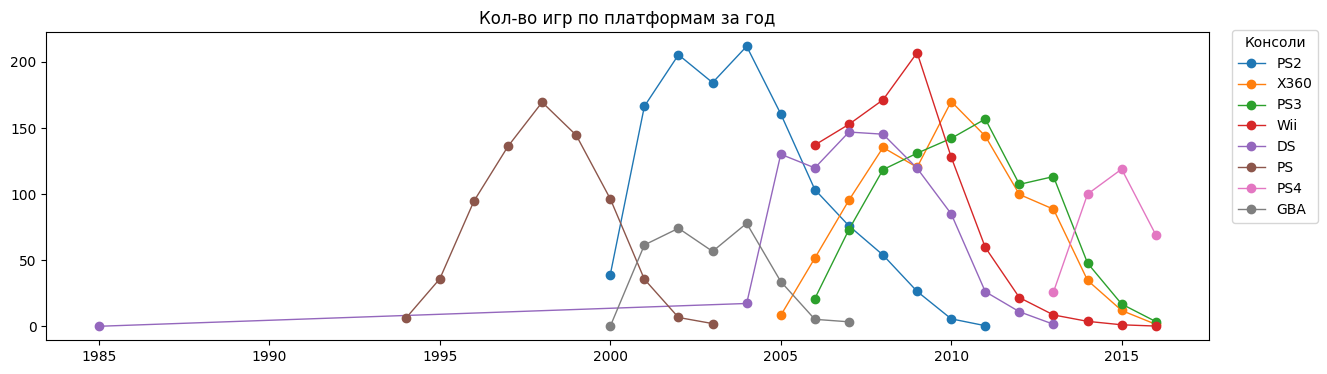

In [23]:
pop_platforms = games.groupby('platform').agg({'total_sale': 'sum'}).sort_values(by='total_sale', ascending=False).head(8).index.to_list()
pic_platform(pop_platforms)

В выборку попали 6 + 2 платформы. Шесть платформ показали максимальную доходность из них рекордцменом является __PS2__, а две хоть и не рекорцмены показали уверенный рос на конец 2015 года это __PS4__ и __XOne__.  
1) __PS2__- появилась 2000 закончила своё существование 2011 - 11 лет 
2) __X360__- появилась 2005 закончила свое существоание 2015 - 10 лет
3) __PS3__- появилась  2006 закончила свое существоание 2016 - 10 лет
4) __Wii__- появилась  2005 закончила свое существоание 2013 - 8 лет  
 Итак далеею. Все консоли жкивут в среднем около 10 лет это обусловлино в первую очередь тем что "железо" стареет и то что имело вау эффект в 2005 в 2015 обсалютно не актульно.
5) __DS__ - судя по всему все консоли Nintendo объеденили в одну DS если правильно помню DS вышла в 2004 году а в 1985 были игровые автоматы и GameWatch   
 


In [24]:
pop_platforms = games.groupby('platform').agg({'total_sale': 'sum'}).sort_values(by='total_sale', ascending=False).head(7).index.to_list()

for i in pop_platforms:
    print('Консоль:',i, 'бала на рынке:', games[games['platform'] == i]['year_of_release'].max()-games[games['platform'] == i]['year_of_release'].min(),'лет.')

Консоль: PS2 бала на рынке: 11 лет.
Консоль: X360 бала на рынке: 11 лет.
Консоль: PS3 бала на рынке: 10 лет.
Консоль: Wii бала на рынке: 10 лет.
Консоль: DS бала на рынке: 28 лет.
Консоль: PS бала на рынке: 9 лет.
Консоль: PS4 бала на рынке: 3 лет.


__3.5 Динамика продажа игр за актуальный период.__

Определяем актуальный период - период, на основании выводов по которым будем строить предсказательные модели на 2017 год.  

Разумно предположить пириод с 2005-2016. Это пириод когда выдут самые новые консоли и игры. Соответвенно данные за прошлые года не сильно нам нужны поэтому их отбрасываем.

Поэтому построим график по актуальным годам.  
И определим какие платформы лидируют по продажам, растут или падают?




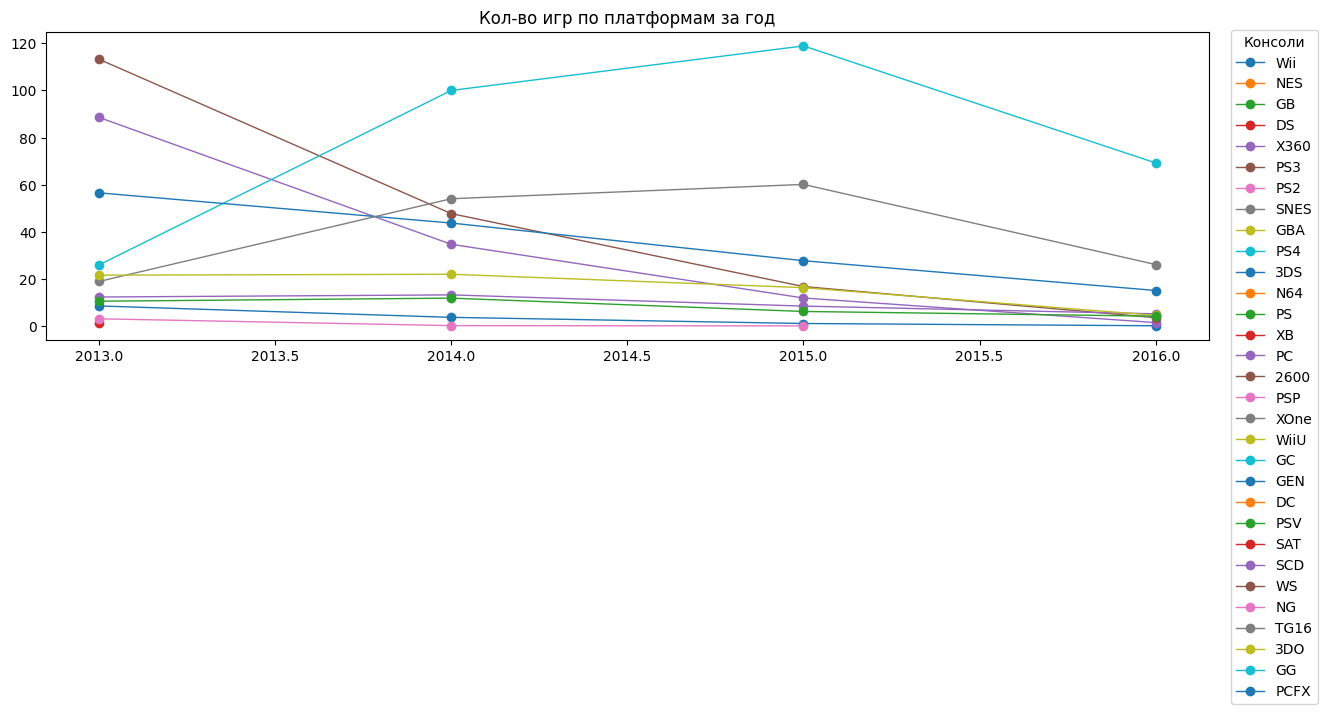

In [25]:
pic_platform(games['platform'].unique(), query="year_of_release>=2013.0")

В выбранный период(на неполный 2016) платформы которые показали максимальную доходность это:  
1) __PS4__
2) __XOne__
3) __3DS__  

Это топчик, но судя по графикам тенденция мягко говоря не очень хорошая, наблюдается падения. 


In [26]:
games_short = games[games['year_of_release'] >= 2013.0] # период с 2013

__3.6 BoxPlot по глобальным продажам игр в разбивке по платформам.__

In [27]:
def box(platform = None):
    if platform == None:
        ax = plt.boxplot(games_short['total_sale'])
        plt.ylim(0,3)
    else:
        top = games_short.query(platform)
        column = platform.split()[0]
        ax = top.boxplot(column = 'total_sale', by =column)
        plt.ylim(0,3)
        

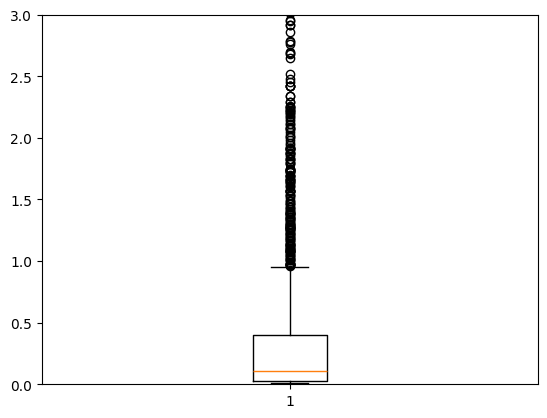

In [28]:
box()

В среденем продажи игр составили 0,4 миллиона. Медиана - 0,1 миллиона долларов. Не лечшие времена переживает отрасль.

In [29]:
games.groupby('platform').agg({'total_sale': 'sum'}).sort_values(by='total_sale', ascending=False).head(8).index.to_list()

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA']

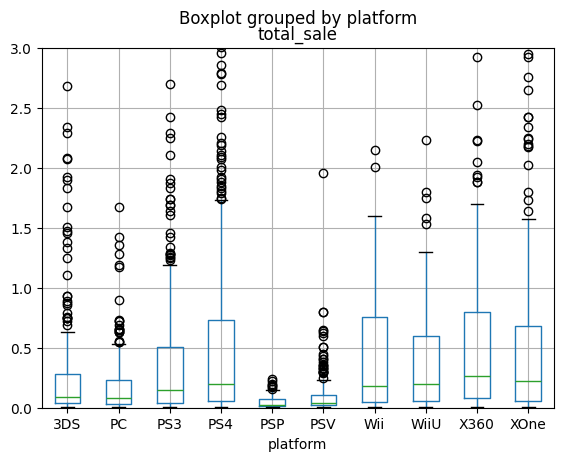

In [30]:
#top = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']
top = games_short.groupby('platform').agg({'total_sale': 'sum'}).sort_values(by='total_sale', ascending=False).head(10).index.to_list()
box(platform= 'platform in @top')


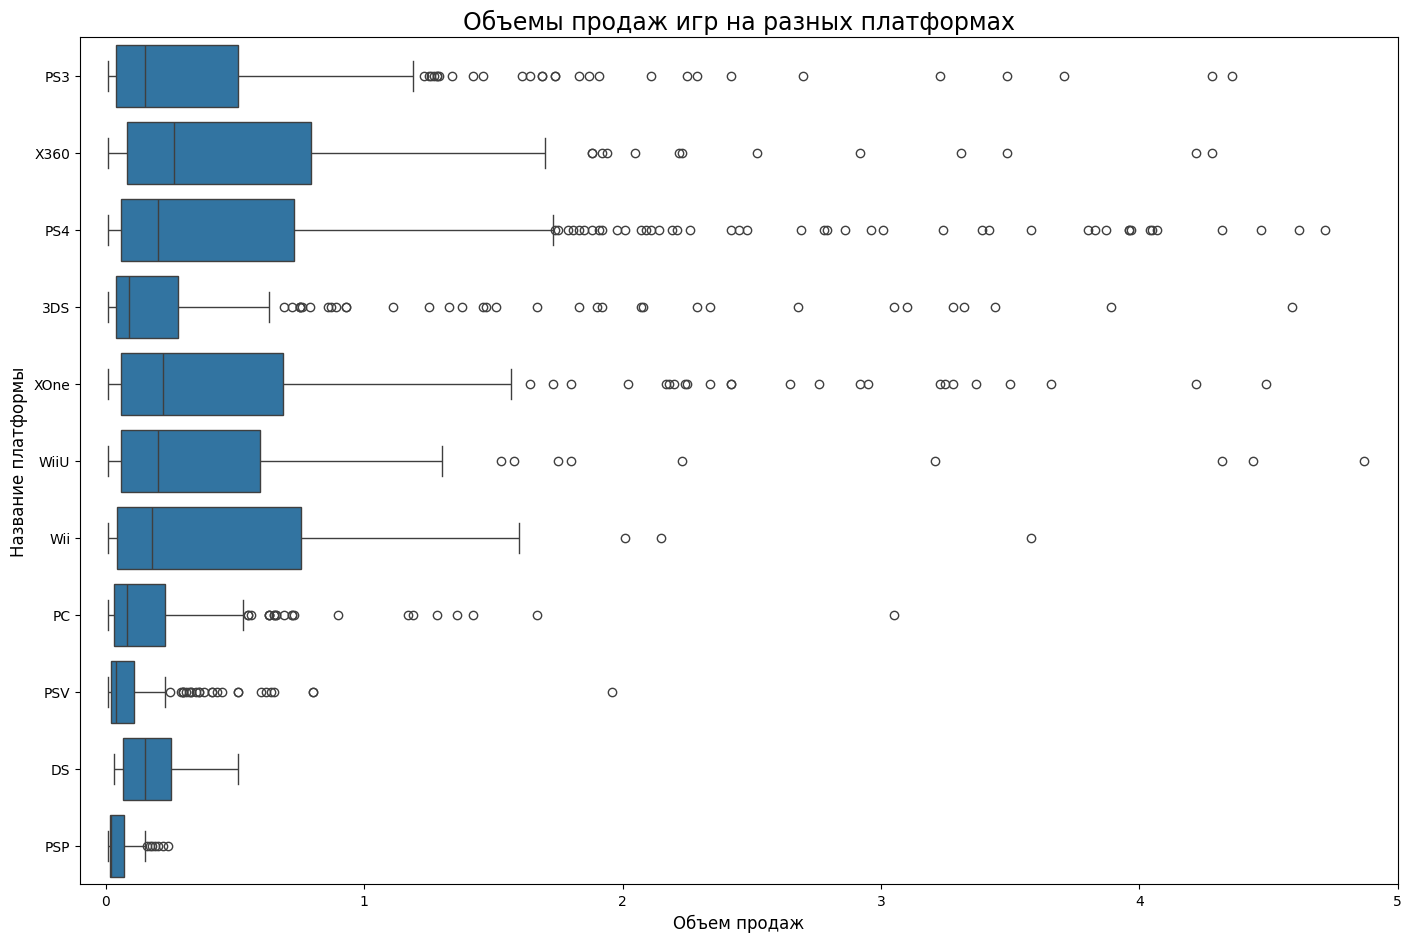

In [31]:
plt.figure(figsize=(17, 11))
sns.boxplot(data=games_short, y='platform', x='total_sale')
plt.xlim(-0.1, 5)

plt.title('Объемы продаж игр на разных платформах', size=17)
plt.xlabel('Объем продаж', size=12)
plt.ylabel('Название платформы', size=12)

plt.show()

Медиана по топовым платформам колеблится в пределах от 0,2 до 0,25 млн продажу игр.  
Верхняя граница предела, за которыми уже определяются аномалии, у двух платформ - PS4 и X360 - на уровне 1,7 млн долларов.  
У остальных - от 1 до 1,5 миллионов.  
Среди всех выделяется PSP - у него эти показатели сильное хуже. Медиана меньше 0,1 миллиона, верхняя граница - 0,6 млн.  

__3.7 Влияние отзывов критиков и пользователей на продажи игр.__

Рассмотрим на примере одной платформе. За модель возьмем X360. Она довно на рынке, по ней много данных, она делит пальму первенства с PS3.

In [32]:
games_x360 = games_short[(games_short['platform'] == 'X360') & (games_short['critic_score'] > 0)].copy()

___Диаграмма рассеивания зависимости продажи от мнения критиков.___

0.3503445460228664

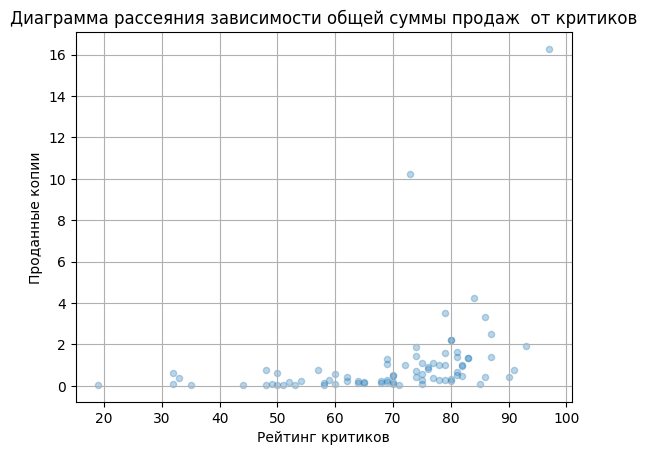

In [33]:
games_x360.plot(kind = 'scatter', x = 'critic_score', y ='total_sale' , alpha = 0.3, xlabel = 'Рейтинг критиков',  ylabel = 'Проданные копии', title = 'Диаграмма рассеяния зависимости общей суммы продаж  от критиков', grid=True,)
pass
games_x360['critic_score'].corr(games_x360['total_sale'])

С увиличение рейтинга пользователи охотней покупают.

___Диаграмма рассеивания зависимости продажи от мнения пользователей.___

-0.011742185147181351

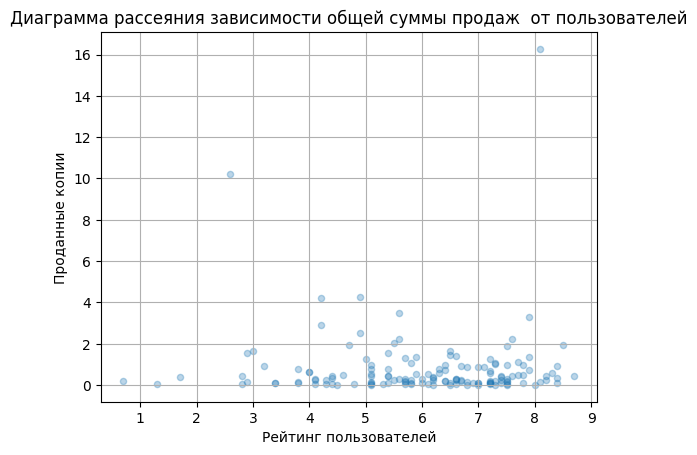

In [34]:
games_x360 = games_short[(games_short['platform'] == 'X360') & (games_short['user_score'] > 0)].copy()
games_x360.plot(kind = 'scatter', x = 'user_score', y ='total_sale' , alpha = 0.3, xlabel = 'Рейтинг пользователей',  ylabel = 'Проданные копии', title = 'Диаграмма рассеяния зависимости общей суммы продаж  от пользователей', grid=True,)
pass
games_x360['user_score'].corr(games_x360['total_sale'])

Ситуация Пичальная если критики оказывают давольно не плохое влияния на покупательскую активность то мнение пользоватлей почти не кого не интресует.

___Hotmap корреляции критиков и пользователей.___

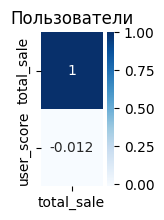

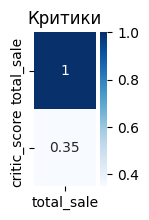

In [35]:
games_corr  = games_short[(games_short['platform'] == 'X360') & (games_short['user_score'] > 0)]
games_corr = games_corr[['total_sale' , 'user_score']]
plt.figure(figsize=(1,2))
sns.heatmap(games_corr.corr()[['total_sale']].sort_values(by='total_sale', ascending=False), cmap="Blues", annot=True).set(title='Пользователи')

games_corr_critic  = games_short[(games_short['platform'] == 'X360') & (games_short['critic_score'] > 0)]
games_corr_critic = games_corr_critic[['total_sale' , 'critic_score']]
plt.figure(figsize=(1,2))
sns.heatmap(games_corr_critic.corr()[['total_sale']].sort_values(by='total_sale', ascending=False), cmap="Blues", annot=True).set(title='Критики')
pass

In [36]:
# код ревьюера

print(games[(games['platform'] == 'X360') & (games['user_score'] > 0) & (games['critic_score'] > 0)].shape[0])
print(games[(games['platform'] == 'X360') & (games['user_score'] > 0)].shape[0])
print(games[(games['platform'] == 'X360') & (games['critic_score'] > 0)].shape[0])

861
945
894


Сильнее всего на конечный доход влияет оценка критиков. Сильно меньше влияет оценка пользователей. Возможно вызвоно тем что к критикам доверия больше и более "объективная" оценка. Тогда как разным людям нравится разные жанры. 

___Hotmap влияния критиков и пользователей по разным платформам.___

In [37]:
def heatmap(score):

    _, axes = plt.subplots(1, 8,figsize=(30,3))
    top = games_short.groupby('platform').agg({'total_sale': 'sum'}).sort_values(by='total_sale', ascending=False).head(10).index.to_list()

    count = 0
    for c in range(8):
        test = top[count]
        game_corr  = games_short[(games_short[score] > 0)]
        game_corr = game_corr[game_corr['platform'] == test]
        game_corr_t = game_corr[['total_sale', score]]
        #plt.figure(figsize=(1,2))
        ax = sns.heatmap(game_corr_t.corr()[['total_sale']].sort_values(by='total_sale', ascending=False), cmap="Blues", annot=True, ax=axes[count], annot_kws={'size':20})
        ax.set_title(test, fontsize=20)
        
        count +=1 

Корреляция влияние мнение критиков


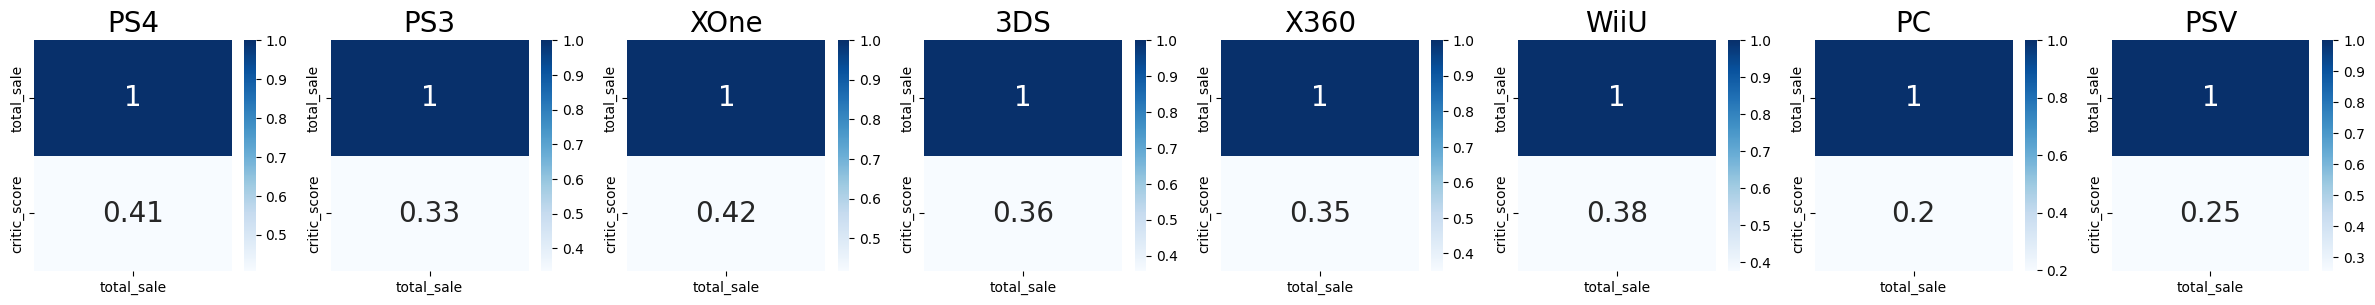

In [38]:
heatmap('critic_score')
print('Корреляция влияние мнение критиков')

Корреляция влияние мнение пользователей


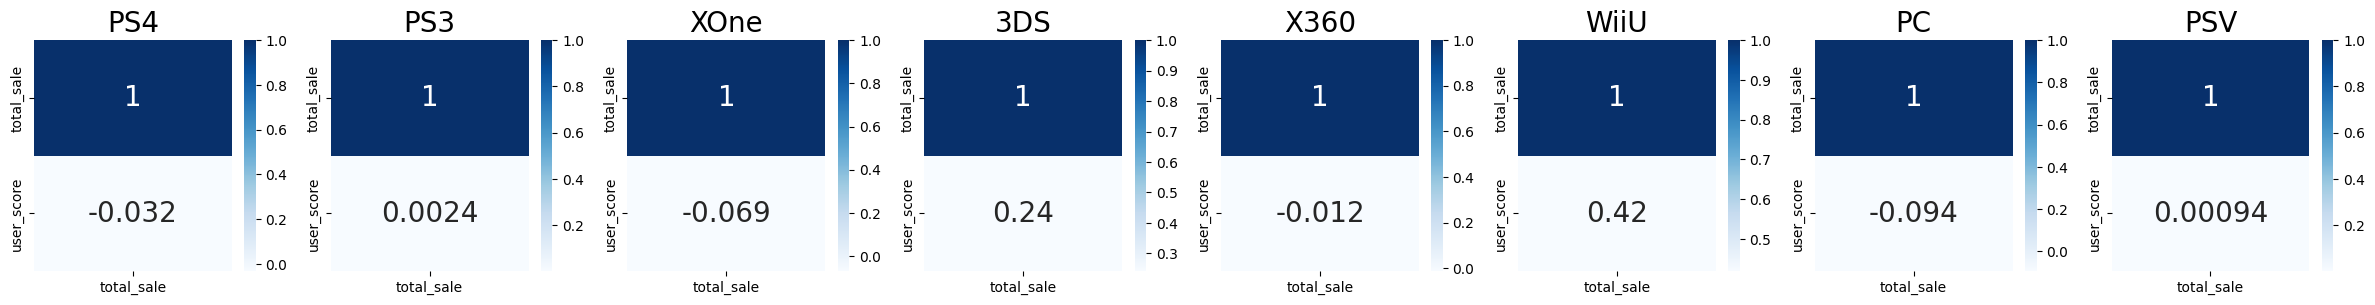

In [39]:
heatmap('user_score')
print('Корреляция влияние мнение пользователей')

Данные по корреляции между выручкой и оценкой по платформам __PS2, X360, PS3, PS__ и __XOne__ совпадает с общими данными по DF.  
Отличаются __Wii__ и __DS__, по которым зависимость не такая большая.  
Есть платформы, где оценка критиков, согласно данных, сильнее "определяет" конечную выручку продукта, чем оценка пользователей. Это платформы __DS__, __PS4__ и Xone. результаты не совсем обьективные так как часть игровых консолей радавольно сильно лаколезованы в определённых регионах, другие же популярны во всем мире. PS4 и XОne - платформы довольно новые (на момент исследования) сечас уже знаем чем вызвана ниская корреляция пользоватей так как выпус был с сырими играми и пользователи отровенно хэйтили и одну и другую консоль.  

__3.8. Распределение игр по жанрам.__

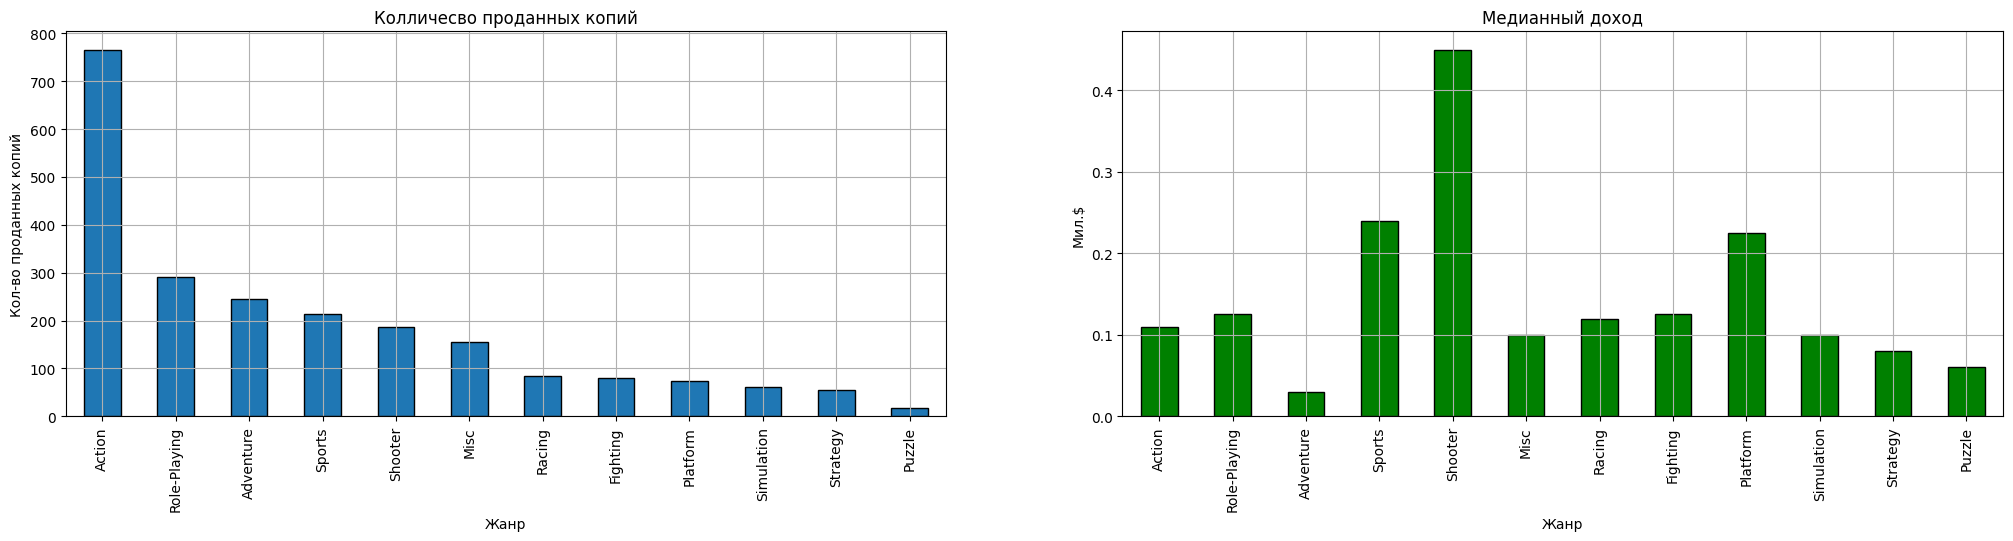

In [40]:
_, axes = plt.subplots(1, 2,figsize=(25,5))
test = games_short.groupby('genre').agg({'name':'count','total_sale':'median'}).sort_values(by='name', ascending=False)

test['name'].plot(kind='bar',edgecolor='black', ax=axes[0], grid=True,  xlabel='Жанр', ylabel = 'Кол-во проданных копий', title='Колличесво проданных копий')

test['total_sale'].plot(kind='bar',  color = 'green',  edgecolor='black', grid=True, title='Медианный доход', xlabel='Жанр', ylabel = 'Мил.$',ax=axes[1]
                    )
pass


Больше всего принесло дохода игры жанра Shooter. За ними идут игры спортивного жанра.


__Подведём итог!__  
_Самые продоваемые!_  
1) __Action__
2) __Role_Playing__
3) __Adventure__

Хуже всех игры на подумать.  
Strategy и Puzzle  

_Самые дорогие__
1) __Sports__
2) __Shooter__


Самые дешовые.  
Adventure, Strategy и Puzzle  

_Максималная выручка(не доход)_  
1) __Platform__
2) __Sports__
3) __Shooter__



### 4.  Составим портрет пользователя регионов NA, EU, JP, Other ###

__4.1 Самые популярные платформы__

In [41]:
def L_reg(table, region, ax):
    dis_title = {'na_sales':'Северная Америка','eu_sales':'Европейский регион','jp_sales':'Азиатский регион', 'other_sales':'Другие регионы'}
    dis_color = {'na_sales':'yellow','eu_sales':'gray','jp_sales':'red', 'other_sales':'green'}
    pic = games_short.groupby(table).agg({region:'sum'}).sort_values(by=region, ascending=False).head()
    pic.plot(kind='bar', grid=True, title= dis_title[region], ax=axes[ax], color=dis_color[region], edgecolor='black',  rot=20, legend=False)

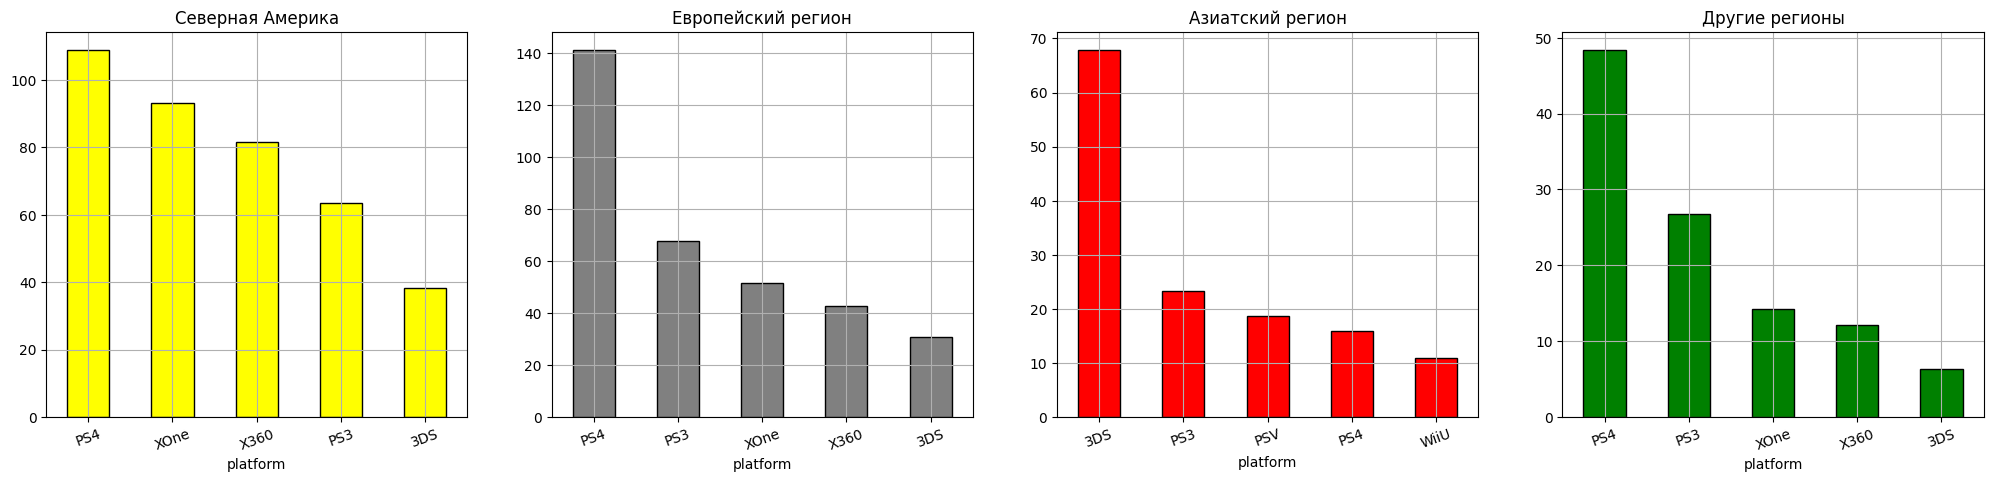

In [42]:

_, axes = plt.subplots(1, 4,figsize=(25,5))
L_reg('platform', 'na_sales', 0)
L_reg('platform', 'eu_sales',1)
L_reg('platform', 'jp_sales', 2)
L_reg('platform', 'other_sales', 3)


В северной америке имели огромную популярность __PS4__ и __XOne__ немного отстала __X360__.  
В европе и другие регионы сетуация похожа приоритет отдан сони с её __PS4__ а затем __PS3__ и на третий позиции __XOne__.  
В азиатском реионе все очень предсказуемо, консервативные азиаты отдали предпочтение своим консолям __3DS, PS3, PSV__  американские вообще не попали в рейтинг.


__4.2 Самые популярные жанры__

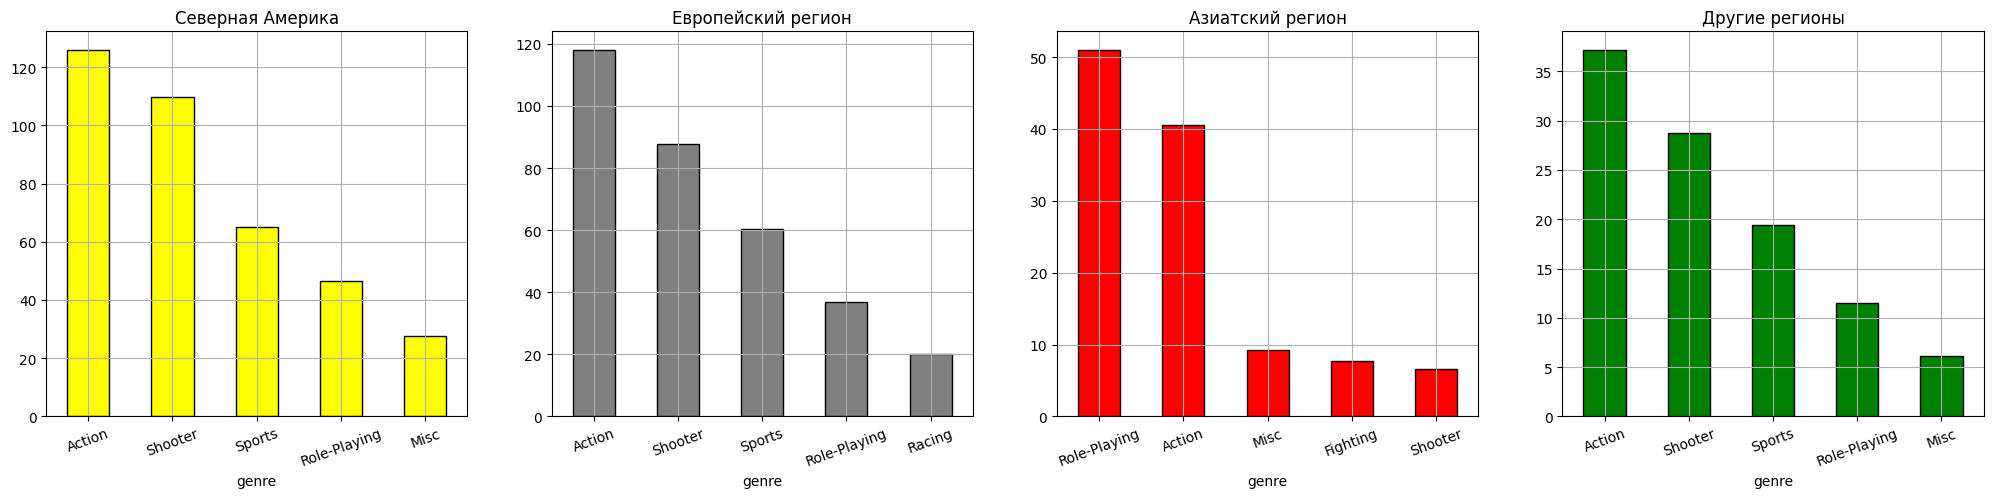

In [43]:
_, axes = plt.subplots(1, 4,figsize=(25,5))
L_reg('genre', 'na_sales', 0)
L_reg('genre', 'eu_sales',1)
L_reg('genre', 'jp_sales', 2)
L_reg('genre', 'other_sales', 3)

В северной америке как и в европе как и в другие регионы предпочтение отдоют __Action, Sport, Shooter__. В азиатском регионе На перовом месте Ролевые игры :-)

__4.3 Влияние рейтинга ESRB на продажи в отдельном регионе.__

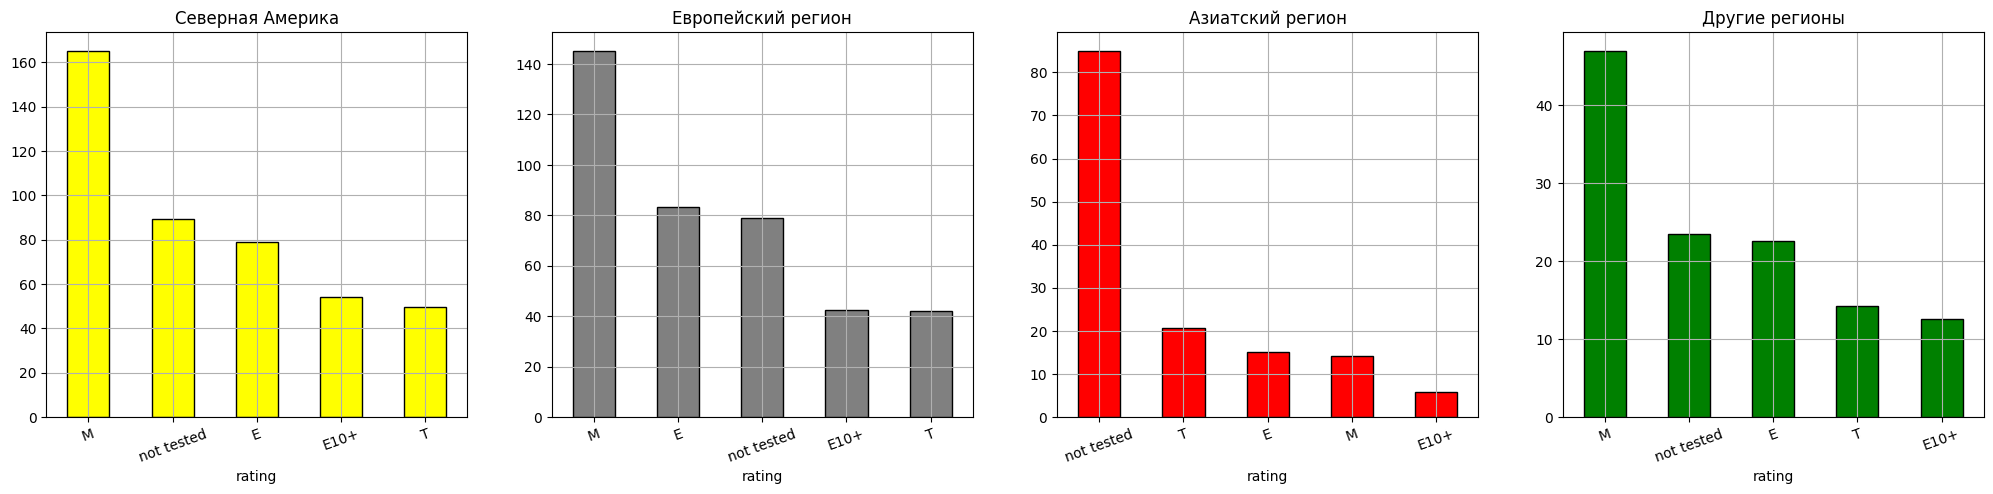

In [44]:
_, axes = plt.subplots(1, 4,figsize=(25,5))
L_reg('rating', 'na_sales', 0)
L_reg('rating', 'eu_sales',1)
L_reg('rating', 'jp_sales', 2)
L_reg('rating', 'other_sales', 3)

Самые популярные категория __M__- для взрослых, следующая категрия не тестировалось и завершает нашу тройку лидеров категория __E__ и __Т__ для всех и подростков соответсвенно. В азиатском регионе привалируют игры не проходившее ранжирование. Возможно, это связано с тем что система ранжирования в америке а игры в японии множество старых игр которые были выпущины до появления системы ранжирования.

### 5. Проверка гипотез ###

__Гипотезы:__

1) средние пользовательские рейтинги платформ __Xbox One__ и __PC__ одинаковые;  
2) средние пользовательские рейтинги жанров __Action__ и __Sports__ разные.

Для проверки обеих гипотез будем использовать распределение Стьюдента, т.к. в обоих случаях выборки независимы между собой.  
Определим пороговое значение alpha = 0.05

__5.1 Гипотеза №1.__

__H0__ (нулевая гипотеза) - предположим что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.  
__H1__ (альтернативная гипотеза) - средние пользовательские рейтинги  платформ Xbox One и PC различны.

In [45]:
games_short.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sale
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,not tested,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,not tested,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


In [46]:
xbox_one = games_short[(games_short['platform'] == 'XOne') & (games_short['user_score'] > 0)]['user_score']

pc = games_short[(games_short['platform'] == 'PC') & (games_short['user_score'] > 0)]['user_score']

alpha = 0.05

results = st.ttest_ind(xbox_one, pc)

print('P-value:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')


P-value: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


По результатом проверки не получилось отвергнуть нулевую гипотезу.  
Верно следующее утверждение: __Что с большой долей вероятности средние пользовательские рейтинги платформ XOne и PC не имеют статистически значимых отличий.__

__5.2 Гипотеза №2.__

__Средние пользовательские рейтинги жанров Action и Sports разные.__


1) __Н0__ (нулевая гипотеза) - средние пользовательские рейтинги жанров Action и Sports одинаковые.
1) __Н1__ (альтернативная гипотеза) - средние пользовательские рейтинги жанров Action и Sports отличаются между собой.

In [47]:
action = games_short[(games_short['genre'] == 'Action') & (games_short['user_score'] > 0)]['user_score']

sports = games_short[(games_short['genre'] == 'Sports') & (games_short['user_score'] > 0)]['user_score']

alpha = 0.05

results = st.ttest_ind(action, sports)

print('P-value:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

P-value: 1.0517832389140023e-27
Отвергаем нулевую гипотезу


По результатом проверки отвергаем нулевую гипотизу.  
Мы можем предположить следующее утверждение: __Что с большой долей вероятности пользовательские рейтинги жанров Action и Sports отличаются между собой.__

### Шаг 6. Общий вывод ###

Проведена загрузка и первичная обработка данных, которая показала, что данные довольно грядные много пропусков, около 12% от всех данных.    
TBD из колонки user_score - переименовано в NaN.  
Так как пропусков очень много было принято решение не удалять строки а слопцы  user_score  и  critic переименовать NaN в -1 так как это значение в дальнейшем легко исключить из выборки.    
Добавил поле суммарные продажи.  
В результате проведения исследовательского анализа Данные была построена диаграмма распределения кол-ва игр по годам которая показала,
 что данные до 1994 года не имеют особой ценности. Дальше мы видим устойчивый рост популярности до 2008-2009 года с небольшим провалом "проблемы нулевых". Снижение обусловлено появление соц. сетей, возросшей мощностью телефонов и появление мобильных игр и переходом пользователей с другие области.    
 Был построена график количество выпущенных игр по платформам, на нем явно видно что самой массовой игровой консолью была PS2.  Так же построил график Кол-во игр по платформам за год, на нем отчетливо видно что самая популярная консоль не всегда самая перспективная.  
 Произведенная выборка самых перспективных консолей показала что срок жизни консоли в среднем составляет около 10 лет, это связано с техническим устареванием консоли.  
 Определил актуальный период для анализа на 2017 год это период с 2013-2016. дальнейшие исследования проводилась в этом периоде.  И исследования в этот периоде показали, что самые перспективные консоли __PS4, XOne, 3DS__.  
 Построенный Boxplot показал что среднем продажи игр составили 0,4 миллиона. Медиана - 0,1 миллиона. что показывает что индустрия переживает не лучшие времена.  
 Медиана по топовым платформам колеблется в пределах от 0,2 до 0,25 млн продажу игр.  
Верхняя граница предела, за которыми уже определяются аномалии, у двух платформ - PS4 и X360 - на уровне 1,7 млн долларов.  
У остальных - от 1 до 1,5 миллионов.  
Среди всех выделяется PSP - у него эти показатели сильное хуже. Медиана меньше 0,1 миллиона, верхняя граница - 0,6 млн.  
посмотрел как влияют отзывы критиков и пользователей построил диаграммы рассеивания и heatmap-ы :-). Все в принципе ожидаемо критики довольно не плохо влияют на решение приобрести игры а вот положительные отзывы не очень, зато неплохо влияют отрицательные отзывы пользователей это видно на двух консолях от Microsoft.  
Проверил какие самые популярные жанры игр и какие принесли самый большой медианный доход: популярные жанры __Action, Role_Playing, Adventure__, доход __Platform, Sports, Shooter__. так же посмотрел самые не перспективные жанры: __Strategy и Puzzle__.  
Составил портрет предпочтений пользователя регионов NA, EU, JP, Other, по консолям по жанрам и по возрастным ограничениям. Выявлена колоссальная разница в предпочтениях у востока и запада.  
__По жанрам:__ В северной Америке как и в Европе как и в другие регионы предпочтение отдают __Action, Sport, Shooter__. В азиатском регионе На перовом месте Ролевые игры :-)  
__По консолям:__ В северной Америке имели огромную популярность __PS4 и XOne__ немного отстала __X360__. В Европе и другие регионы ситуация похожа приоритет отдан сони с её __PS4__, а затем __PS3__ и на третий позиции __XOne__. В азиатском регионе все очень предсказуемо, консервативные азиаты отдали предпочтение своим консолям __3DS, PS3, PSV__ американские вообще не попали в рейтинг.  
__По рейтингу:__ Самые популярные категория __M__- для взрослых, следующая категория не тестировалось и завершает нашу тройку лидеров категория __E__ и __Т__ для всех и подростков соответственно. В азиатском регионе превалируют игры не проходившее ранжирование. Возможно, это связано с тем что система ранжирования в Америке а игры в Японии множество старых игр которые были выпущены до появления системы ранжирования.  
__Проверил две гипотезы.__  
1) средние пользовательские рейтинги платформ __Xbox One__ и __PC__ одинаковые;  
2) средние пользовательские рейтинги жанров __Action__ и __Sports__ разные.   
__И первая и гипотеза подтвердились, а вторя нет.__
  
  

В целом видим довольно грустную картину индустрия не "мобильных" игр потихоньку угасает. Все сейчас в погоне за графикой, новыми технологами, в связи с этим средний бюджет на разработку одной игры за последние годы заметно вырос. Более того, сейчас игрок не ценит идею и глубины игры, для большинства основным критерием хорошая картинка и оптимизация игры без нити Ариадны для современных игроков уже запредельно трудно. 

В итоге, крупные игроки индустрии гонятся за технологиями, а более мелкие компании, не имеющие таких бюджетов, вынуждены отступать, т.к. единственный их козырь - способность создать глубокую игру с атмосферной - нынче не ценится, хотя есть и исключения из практики.
Всё это привело к тому, что рынок уже который год падает. И, скорее всего, будет падать. 